# **Часть 1**

## Neural Style Transfer

Я выбрала датасет с фотографиями кошек для content и датасет с абстрактными картинами для Style

In [ ]:
!pip install pycocotools

In [17]:
!unzip -o Data.zip -d /content/dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/dataset/Data/cat_5504.png  
  inflating: /content/dataset/Data/cat_5505.png  
  inflating: /content/dataset/Data/cat_5506.png  
  inflating: /content/dataset/Data/cat_5507.png  
  inflating: /content/dataset/Data/cat_5508.png  
  inflating: /content/dataset/Data/cat_5509.png  
  inflating: /content/dataset/Data/cat_551.png  
  inflating: /content/dataset/Data/cat_5510.png  
  inflating: /content/dataset/Data/cat_5511.png  
  inflating: /content/dataset/Data/cat_5512.png  
  inflating: /content/dataset/Data/cat_5513.png  
  inflating: /content/dataset/Data/cat_5514.png  
  inflating: /content/dataset/Data/cat_5515.png  
  inflating: /content/dataset/Data/cat_5516.png  
  inflating: /content/dataset/Data/cat_5517.png  
  inflating: /content/dataset/Data/cat_5518.png  
  inflating: /content/dataset/Data/cat_5519.png  
  inflating: /content/dataset/Data/cat_552.png  
  inflating: /content/dataset/Data

In [21]:
!unzip -o paint.zip -d /content/dataset

Archive:  paint.zip
   creating: /content/dataset/paint/
  inflating: /content/dataset/paint/alberto-magnelli_lyrical-explosion-no-12-1918.jpg  
  inflating: /content/dataset/paint/aleksandra-ekster_color-construction-1912.jpg  
  inflating: /content/dataset/paint/aleksandra-ekster_color-dynamics-1914.jpg  
  inflating: /content/dataset/paint/aleksandra-ekster_construction-1923.jpg  
  inflating: /content/dataset/paint/aleksandra-ekster_futuristic-composition-1918.jpg  
  inflating: /content/dataset/paint/aleksandra-ekster_interno-cubista-1912.jpg  
  inflating: /content/dataset/paint/alexej-von-jawlensky_autumn-sound-1918.jpg  
  inflating: /content/dataset/paint/alexej-von-jawlensky_meditation-1936.jpg  
  inflating: /content/dataset/paint/alexej-von-jawlensky_variation-1916.jpg  
  inflating: /content/dataset/paint/alexej-von-jawlensky_variation-1918.jpg  
  inflating: /content/dataset/paint/alexej-von-jawlensky_variation-field-of-tulips-1916.jpg  
  inflating: /content/dataset/pain

## Загрузка VGG19

In [ ]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 97.3MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

Для решения задачи воспользуемся параметрами из предобученной VGG19.

In [ ]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [ ]:
dev = torch.device("cuda" if torch.cuda.is_available else "cpu")
print(dev)

cuda


In [ ]:
vgg.to(dev)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Предобработка изображений

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [ ]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size=500):
  image = Image.open(img_path).convert("RGB")
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  img_transforms = T.Compose([
      T.Resize(size),
      T.ToTensor(),
      T.Normalize(mean=[0.485, 0.456, 0.406],
                  std=[0.229, 0.224, 0.225])
  ])
  image = img_transforms(image)
  image = image.unsqueeze(0) # (3, 224, 224) -> (1, 3, 224, 224)

  return image

Посмотрим на перенос стиля на конкретных двух картинках

In [40]:
content_preprocess = preprocess("/content/dataset/Data/cat_10897.png")
style_preprocess = preprocess("/content/dataset/paint/alberto-magnelli_lyrical-explosion-no-12-1918.jpg")

content_preprocess = content_preprocess.to(dev)
style_preprocess = style_preprocess.to(dev)

print(f"Content shape {content_preprocess.shape}")
print(f"Style shape {style_preprocess.shape}")

Content shape torch.Size([1, 3, 64, 64])
Style shape torch.Size([1, 3, 500, 500])


## Преобразование вектора в картинку

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to("cpu").clone()
  image = image.numpy()
  image = image.squeeze(0) # (1, 3, 224, 224) -> (3, 224, 224)
  image = image.transpose(1, 2, 0) # (3, 224, 224) -> (224, 224, 3)
  image = image * np.array([0.485, 0.456, 0.406]) + np.array([0.229, 0.224, 0.225])
  image = image.clip(0,1)

  return image


In [24]:
content_deproc = deprocess(content_preprocess)
style_deproc = deprocess(style_preprocess)

print(f"Deprocess content: {content_deproc.shape}")
print(f"Deprocess style: {style_deproc.shape}")

Deprocess content: (64, 64, 3)
Deprocess style: (500, 500, 3)


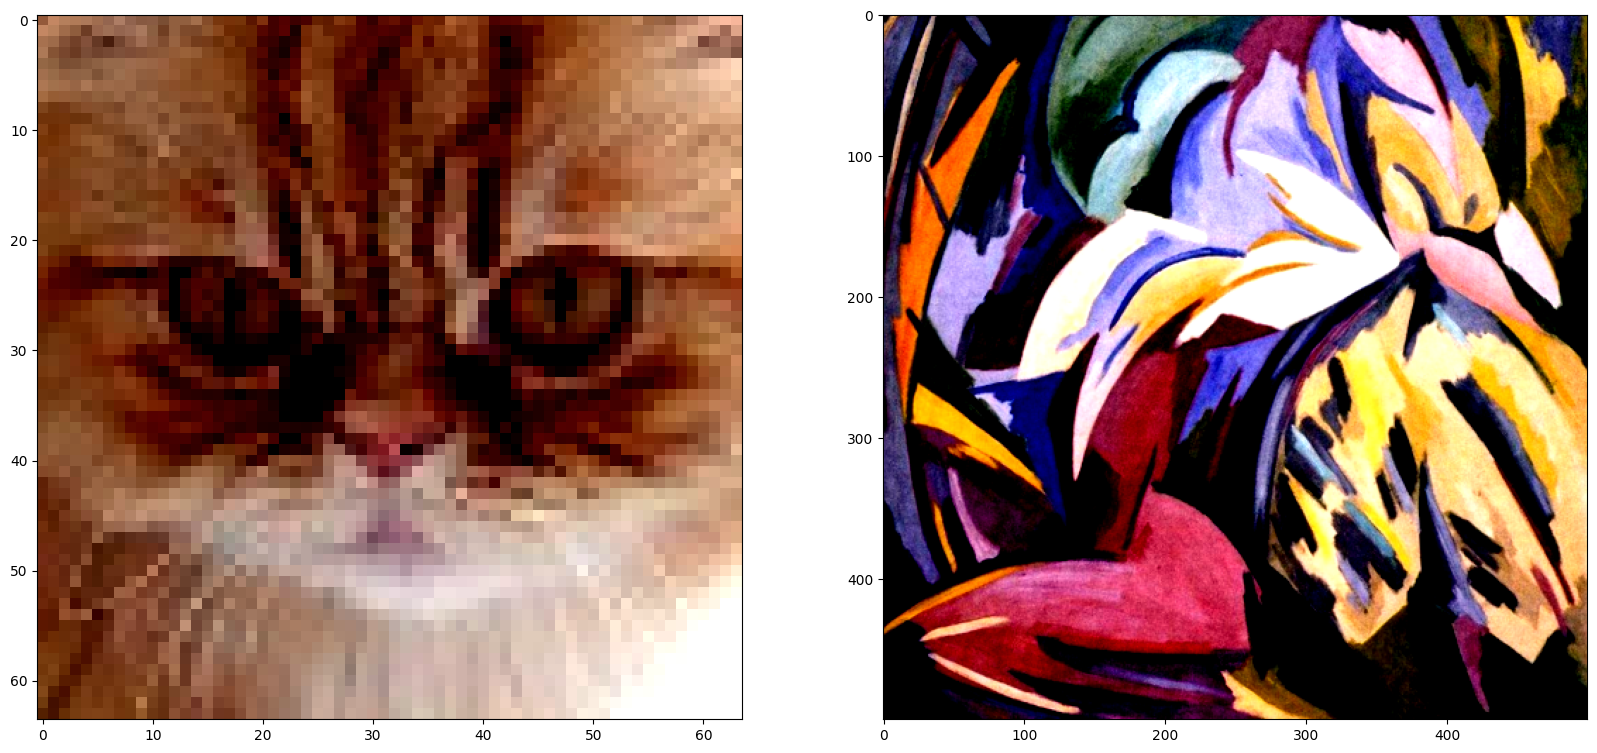

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.imshow(content_deproc)
ax2.imshow(style_deproc);

## Извлечение признаков из картинки и стиля, построение матрицы Грама

In [26]:
def get_features(image, model):
  layers = {
      "0": "conv1_1",  # see representaion.png
      "5": "conv2_1",
      "10": "conv3_1",
      "19": "conv4_1",
      "21": "conv4_2", #content_feature
      "28": "conv5_1"
  }

  x = image
  Features = {}
  for name, layer in model._modules.items():
    x = layer(x)
    if name in layers:
      Features[layers[name]] = x

  return Features

In [27]:
content_features = get_features(content_preprocess, vgg)
style_features = get_features(style_preprocess, vgg)

In [28]:
def gram_matrix(tensor):
  b, c, h, w = tensor.size()
  tensor = tensor.view(c, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [29]:
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

## Создание функций потерь для картинки и стиля

In [30]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss

In [31]:
style_weights = {
    "conv1_1": 1.0,
    "conv2_1": 0.75,
    "conv3_1": 0.75,
    "conv4_1": 0.75,
    "conv5_1": 0.75
}

In [32]:
def style_loss(style_weights, target_fs, style_grams):
  loss = 0
  for layer in style_weights:
    target_feature = target_fs[layer]
    target_gram = gram_matrix(target_feature)
    style_gram = style_grams[layer]
    b, c, h, w = target_feature.shape
    layer_loss = style_weights[layer]*torch.mean((target_gram-style_gram)**2)
    loss += layer_loss/(c*h*w)

  return loss

In [33]:
target = content_preprocess.clone().requires_grad_(True).to(dev)
target_f = get_features(target,vgg)
print(f"Content loss: {content_loss(target_f['conv4_2'], content_features['conv4_2'])}")
print(f"Style loss: {style_loss(style_weights, target_f,style_grams)}")

Content loss: 0.0
Style loss: 39648.6640625


## Обучение модели

In [34]:
from torch import optim

optimizer = optim.Adam([target],lr=0.003)

alpha = 1.0
beta = 1e5
epochs = 4000
show_every = 500

In [35]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha*c_loss + beta*s_loss
  return loss

In [36]:
results = []

for i in range(epochs):
  target_f = get_features(target,vgg)
  c_loss = content_loss(target_f["conv4_2"], content_features["conv4_2"])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss,s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print(f"Total loss at Epoch {i}: {t_loss}")
    results.append(deprocess(target.detach()))

Total loss at Epoch 0: 3964866304.0
Total loss at Epoch 500: 2338492672.0
Total loss at Epoch 1000: 1702095104.0
Total loss at Epoch 1500: 1383759872.0
Total loss at Epoch 2000: 1181102592.0
Total loss at Epoch 2500: 1037263744.0
Total loss at Epoch 3000: 938063552.0
Total loss at Epoch 3500: 866334656.0


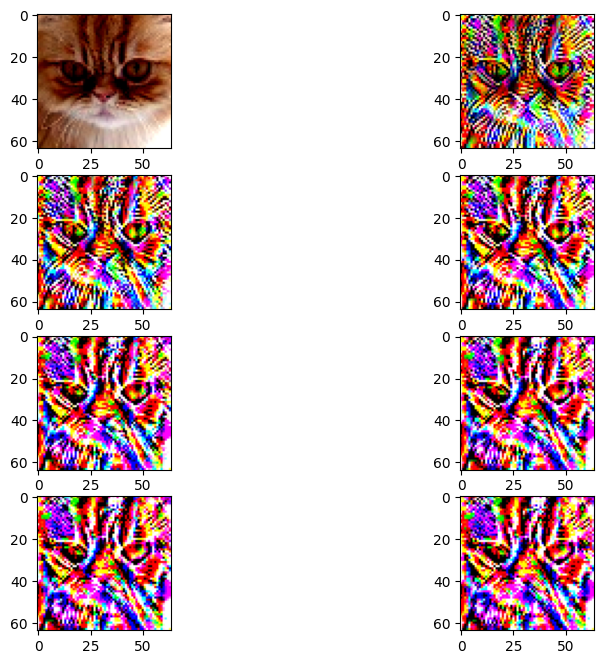

In [37]:
plt.figure(figsize=(10,8))
for i,_ in enumerate(results):
  plt.subplot(4,2, i+1)
  plt.imshow(results[i])
plt.show()

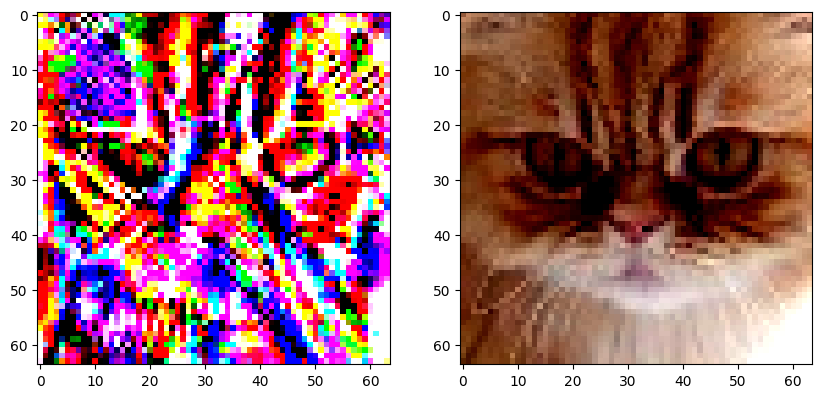

In [38]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_preprocess)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy);

Чтобы применить трансфер на всём датасете, нужно выполнить следующий код
Я решила для запуска ограничиться 5 картинакми из content и style, чтобы не ждать долго выполнения кода, но его можно убрать и посмотреть на перенос стиля

In [39]:
from torch import optim
import os

In [41]:
style_dir = '/content/dataset/paint/'
content_dir = '/content/dataset/Data/'
output_dir = '/content/dataset/result'  # Папка для сохранения результата

os.makedirs(output_dir, exist_ok=True)

content_images = sorted(os.listdir(content_dir))[:5]
style_images = sorted(os.listdir(style_dir))[:5]

for content_img, style_img in zip(content_images, style_images):
    content_path = os.path.join(content_dir, content_img)
    style_path = os.path.join(style_dir, style_img)

    content_preprocess = preprocess(content_path).to(dev)
    style_preprocess = preprocess(style_path).to(dev)

    content_features = get_features(content_preprocess, vgg)
    style_features = get_features(style_preprocess, vgg)
    style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

    target = content_preprocess.clone().requires_grad_(True).to(dev)
    optimizer = optim.Adam([target], lr=0.003)

    for i in range(epochs):
        target_features = get_features(target, vgg)
        c_loss = content_loss(target_features["conv4_2"], content_features["conv4_2"])
        s_loss = style_loss(style_weights, target_features, style_grams)
        t_loss = total_loss(c_loss, s_loss, alpha, beta)

        optimizer.zero_grad()
        t_loss.backward()
        optimizer.step()

    output_image = deprocess(target.detach())
    output_image = Image.fromarray((output_image * 255).astype("uint8"))
    output_image.save(os.path.join(output_dir, f"stylized_{content_img}"))
    print(f"Saved stylized image for {content_img}")

Saved stylized image for cat_0.png
Saved stylized image for cat_1.png
Saved stylized image for cat_10.png
Saved stylized image for cat_100.png
Saved stylized image for cat_1000.png


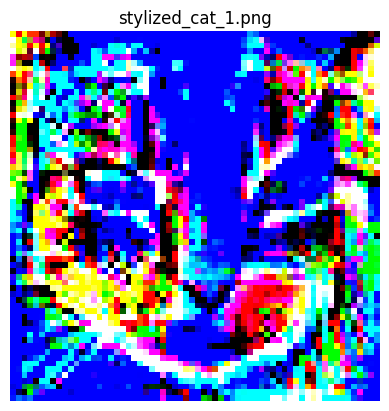

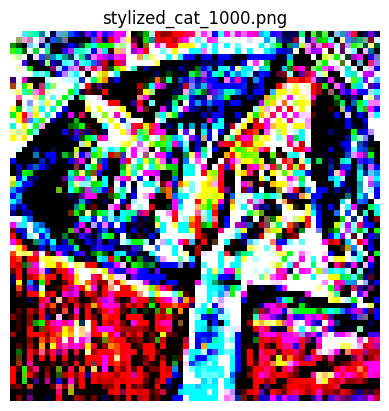

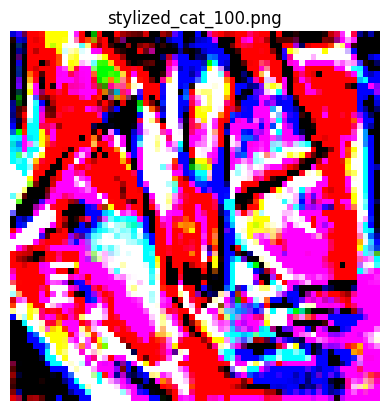

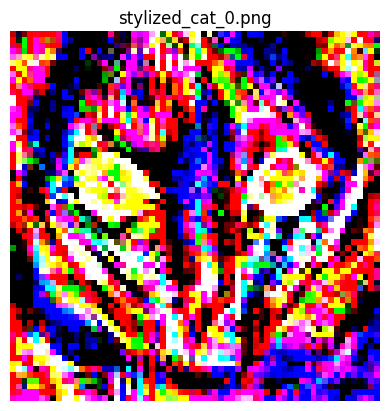

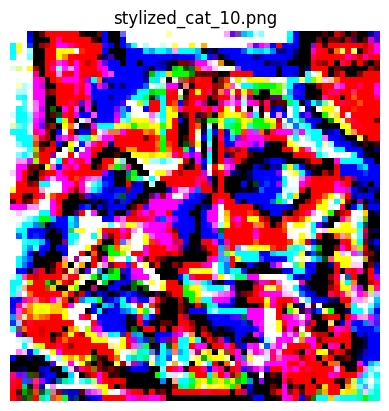

In [42]:
output_files = os.listdir(output_dir)

for file_name in output_files:
    image_path = os.path.join(output_dir, file_name)
    img = Image.open(image_path)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(file_name)
    plt.show()